In [1]:
#import Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

from sklearn import preprocessing
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression

%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load Data
bus = pd.read_csv('ttc-bus-delay-data-2023.csv')
display(bus.head())
display(bus.shape)
weather = pd.read_csv('weatherstats_toronto_daily_rain_snow.csv')
display(weather.head())
display(weather.shape)

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,1-Jan-23,91,02:30,Sunday,WOODBINE AND MORTIMER,Diversion,81,111,NaN,8772
1,1-Jan-23,69,02:34,Sunday,WARDEN STATION,Security,22,44,S,8407
2,1-Jan-23,35,03:06,Sunday,JANE STATION,Cleaning - Unsanitary,30,60,N,1051
3,1-Jan-23,900,03:14,Sunday,KIPLING STATION,Security,17,17,NaN,3334
4,1-Jan-23,85,03:43,Sunday,MEADOWALE LOOP,Security,1,1,NaN,1559


(56207, 10)

,date,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,max_humidex,min_windchill,max_relative_humidity,avg_hourly_relative_humidity,avg_relative_humidity,...,avg_cloud_cover_4,min_cloud_cover_4,max_cloud_cover_8,avg_hourly_cloud_cover_8,avg_cloud_cover_8,min_cloud_cover_8,max_cloud_cover_10,avg_hourly_cloud_cover_10,avg_cloud_cover_10,min_cloud_cover_10
0,2024-12-01,1.6,-2.41,-1.45,-4.5,NaN,-10.0,95,78.8,77.5,...,NaN,NaN,8,5.7,4.5,1,NaN,NaN,NaN,NaN
1,2024-11-30,0.2,-2.25,-2.25,-4.7,NaN,-11.0,81,73.0,71.0,...,NaN,NaN,8,5.4,5.0,2,NaN,NaN,NaN,NaN
2,2024-11-29,2.5,-0.57,-0.10,-2.7,NaN,-9.0,81,70.4,68.5,...,NaN,NaN,8,6.0,5.0,2,NaN,NaN,NaN,NaN
3,2024-11-28,6.4,2.34,3.45,0.5,NaN,NaN,100,74.0,75.0,...,NaN,NaN,8,7.7,7.0,6,NaN,NaN,NaN,NaN
4,2024-11-27,5.0,1.70,1.60,-1.8,NaN,-6.0,77,67.0,65.0,...,NaN,NaN,8,5.5,4.5,1,NaN,NaN,NaN,NaN


(1000, 72)

In [3]:
weather['date'] = pd.to_datetime(weather['date'])
weather_2023 = weather[weather['date'].dt.year == 2023]
display(weather_2023)
bus['date'] = pd.to_datetime(bus['Date'])
display(bus)

,date,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,max_humidex,min_windchill,max_relative_humidity,avg_hourly_relative_humidity,avg_relative_humidity,...,avg_cloud_cover_4,min_cloud_cover_4,max_cloud_cover_8,avg_hourly_cloud_cover_8,avg_cloud_cover_8,min_cloud_cover_8,max_cloud_cover_10,avg_hourly_cloud_cover_10,avg_cloud_cover_10,min_cloud_cover_10
336,2023-12-31,1.4,0.04,-0.10,-1.6,NaN,-7.0,98,86.2,87.5,...,NaN,NaN,8,8.0,8.0,8,NaN,NaN,NaN,NaN
337,2023-12-30,1.3,-0.28,0.20,-0.9,NaN,-7.0,89,78.2,79.5,...,NaN,NaN,8,7.9,7.5,7,NaN,NaN,NaN,NaN
338,2023-12-29,6.4,4.87,3.85,1.3,NaN,NaN,100,97.5,93.5,...,NaN,NaN,8,7.7,6.0,4,NaN,NaN,NaN,NaN
339,2023-12-28,7.7,6.58,6.75,5.8,NaN,NaN,100,100.0,100.0,...,NaN,NaN,8,6.7,6.0,4,NaN,NaN,NaN,NaN
340,2023-12-27,8.2,7.52,7.25,6.3,NaN,NaN,100,100.0,100.0,...,NaN,NaN,8,7.3,6.0,4,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,2023-01-05,4.2,3.19,3.25,2.3,NaN,NaN,100,92.4,88.5,...,NaN,NaN,8,7.8,7.0,6,NaN,NaN,NaN,NaN
697,2023-01-04,3.7,2.60,2.90,2.1,NaN,NaN,100,100.0,100.0,...,NaN,NaN,8,7.9,7.0,6,NaN,NaN,NaN,NaN
698,2023-01-03,4.0,2.78,2.20,0.4,NaN,NaN,100,98.7,94.5,...,NaN,NaN,8,8.0,7.5,7,NaN,NaN,NaN,NaN
699,2023-01-02,5.1,3.73,3.50,1.9,NaN,NaN,100,87.2,86.0,...,NaN,NaN,8,7.1,5.0,2,NaN,NaN,NaN,NaN


,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle,date
0,1-Jan-23,91,02:30,Sunday,WOODBINE AND MORTIMER,Diversion,81,111,NaN,8772,2023-01-01
1,1-Jan-23,69,02:34,Sunday,WARDEN STATION,Security,22,44,S,8407,2023-01-01
2,1-Jan-23,35,03:06,Sunday,JANE STATION,Cleaning - Unsanitary,30,60,N,1051,2023-01-01
3,1-Jan-23,900,03:14,Sunday,KIPLING STATION,Security,17,17,NaN,3334,2023-01-01
4,1-Jan-23,85,03:43,Sunday,MEADOWALE LOOP,Security,1,1,NaN,1559,2023-01-01
...,...,...,...,...,...,...,...,...,...,...,...
56202,31-Dec-23,41,01:26,Sunday,KEELE AND EGLINTON,Operations - Operator,28,53,N,1133,2023-12-31
56203,31-Dec-23,94,01:31,Sunday,CASTLE FRANK STATION,Emergency Services,10,20,NaN,8415,2023-12-31
56204,31-Dec-23,63,01:40,Sunday,OAKWOOD AND VAUGHAN,Diversion,33,43,N,7010,2023-12-31
56205,31-Dec-23,34,01:54,Sunday,EGLINTON STATION,Emergency Services,0,0,N,8761,2023-12-31


In [4]:
# Ensure both datasets have the date column in the same datetime format
weather['date'] = pd.to_datetime(weather['date'])
bus['Date'] = pd.to_datetime(bus['Date'])  # Adjust this column name if necessary
bus_2023 = pd.merge(bus, weather, left_on='Date', right_on='date', how='inner')
# Ensure 'Date' and 'Time' columns are strings
bus_2023['Datestr'] = bus_2023['Date'].astype(str)
bus_2023['Timestr'] = bus_2023['Time'].astype(str)

# Combine 'Date' and 'Time' into a single datetime column
bus_2023['DateTime'] = pd.to_datetime(bus_2023['Datestr'] + ' ' + bus_2023['Timestr'], errors='coerce')

# Convert the combined datetime column to unix_time
bus_2023['unix_time'] = (bus_2023['DateTime'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
display(bus_2023)

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle,...,avg_cloud_cover_8,min_cloud_cover_8,max_cloud_cover_10,avg_hourly_cloud_cover_10,avg_cloud_cover_10,min_cloud_cover_10,Datestr,Timestr,DateTime,unix_time
0,2023-01-01,91,02:30,Sunday,WOODBINE AND MORTIMER,Diversion,81,111,NaN,8772,...,7.0,6,NaN,NaN,NaN,NaN,2023-01-01,02:30,2023-01-01 02:30:00,1672540200
1,2023-01-01,69,02:34,Sunday,WARDEN STATION,Security,22,44,S,8407,...,7.0,6,NaN,NaN,NaN,NaN,2023-01-01,02:34,2023-01-01 02:34:00,1672540440
2,2023-01-01,35,03:06,Sunday,JANE STATION,Cleaning - Unsanitary,30,60,N,1051,...,7.0,6,NaN,NaN,NaN,NaN,2023-01-01,03:06,2023-01-01 03:06:00,1672542360
3,2023-01-01,900,03:14,Sunday,KIPLING STATION,Security,17,17,NaN,3334,...,7.0,6,NaN,NaN,NaN,NaN,2023-01-01,03:14,2023-01-01 03:14:00,1672542840
4,2023-01-01,85,03:43,Sunday,MEADOWALE LOOP,Security,1,1,NaN,1559,...,7.0,6,NaN,NaN,NaN,NaN,2023-01-01,03:43,2023-01-01 03:43:00,1672544580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56202,2023-12-31,41,01:26,Sunday,KEELE AND EGLINTON,Operations - Operator,28,53,N,1133,...,8.0,8,NaN,NaN,NaN,NaN,2023-12-31,01:26,2023-12-31 01:26:00,1703985960
56203,2023-12-31,94,01:31,Sunday,CASTLE FRANK STATION,Emergency Services,10,20,NaN,8415,...,8.0,8,NaN,NaN,NaN,NaN,2023-12-31,01:31,2023-12-31 01:31:00,1703986260
56204,2023-12-31,63,01:40,Sunday,OAKWOOD AND VAUGHAN,Diversion,33,43,N,7010,...,8.0,8,NaN,NaN,NaN,NaN,2023-12-31,01:40,2023-12-31 01:40:00,1703986800
56205,2023-12-31,34,01:54,Sunday,EGLINTON STATION,Emergency Services,0,0,N,8761,...,8.0,8,NaN,NaN,NaN,NaN,2023-12-31,01:54,2023-12-31 01:54:00,1703987640


# Data Cleaning

In [6]:
#remove duplicate
bus_2023 = bus_2023.drop_duplicates()
# Check for completely duplicate rows
duplicate_rows = bus_2023[bus_2023.duplicated(keep=False)]
# Output the duplicate rows or a message if none are found
if not duplicate_rows.empty:
    print("Rows with exactly the same data:") #make sure no duplicate
    display(duplicate_rows)
else:
    print("No rows with exactly the same data.") #make sure no duplicate
    display(bus_2023.shape)

No rows with exactly the same data.


(56007, 87)

In [7]:
#Fill nan and drop the not valid rows
bus_2023['Direction'] = bus_2023['Direction'].fillna('All Direction')
# Fill NaN values in 'snow_on_ground', 'snow', and 'rain' columns with 0
columns_to_fill = ['snow_on_ground', 'snow', 'rain','precipitation']
bus_2023[columns_to_fill] = bus_2023[columns_to_fill].fillna(0)
# List the columns to drop
columns_to_drop = [
    'max_humidex', 'min_windchill', 'max_wind_gust','wind_gust_dir_10s',
    'min_cloud_cover_4', 'solar_radiation', 'min_health_index', 'avg_health_index',
    'avg_hourly_health_index', 'max_health_index', 'max_cloud_cover_4',
    'avg_hourly_cloud_cover_4', 'avg_cloud_cover_4', 'min_cloud_cover_10',
    'avg_cloud_cover_10', 'avg_hourly_cloud_cover_10', 'max_cloud_cover_10',
    'max_uv_forecast', 'min_uv_forecast'
]
bus_2023 = bus_2023.drop(columns=columns_to_drop)
bus_2023 = bus_2023.dropna(subset=['Route'])

# Analysing Features

In [9]:
#new featuers
bus_2023['IsWeekend'] = bus_2023['Day'].isin(['Saturday', 'Sunday'])
bus_2023['Weekday'] = bus_2023['Day']
bus_2023['Year'] = bus_2023['Date'].dt.year
bus_2023['Month'] = bus_2023['Date'].dt.month
bus_2023['Day'] = bus_2023['Date'].dt.day
# Ensure sunrise and sunset times are numeric (unix timestamps)
bus_2023['sunrise_unixtime'] = pd.to_numeric(bus_2023['sunrise_unixtime'], errors='coerce')
bus_2023['sunset_unixtime'] = pd.to_numeric(bus_2023['sunset_unixtime'], errors='coerce')

# Create the 'IsDark' column based on comparisons
bus_2023['IsDark'] = (bus_2023['unix_time'] < bus_2023['sunrise_unixtime']) | (bus_2023['unix_time'] > bus_2023['sunset_unixtime'])

# Generate the 'snow_class' column based on the conditions
bus_2023['snow_class'] = bus_2023['snow'].apply(
    lambda x: 1 if x < 2.5 else (2 if 2.5 <= x <= 7.6 else 3)
)


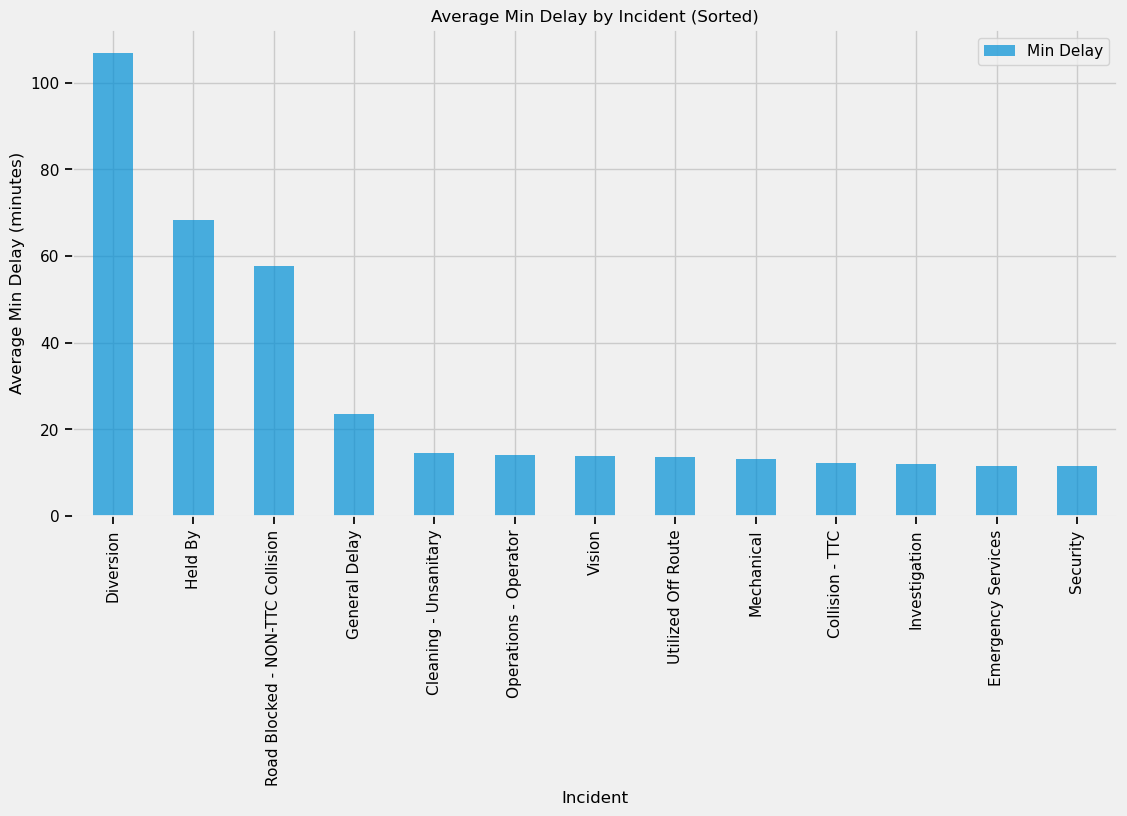

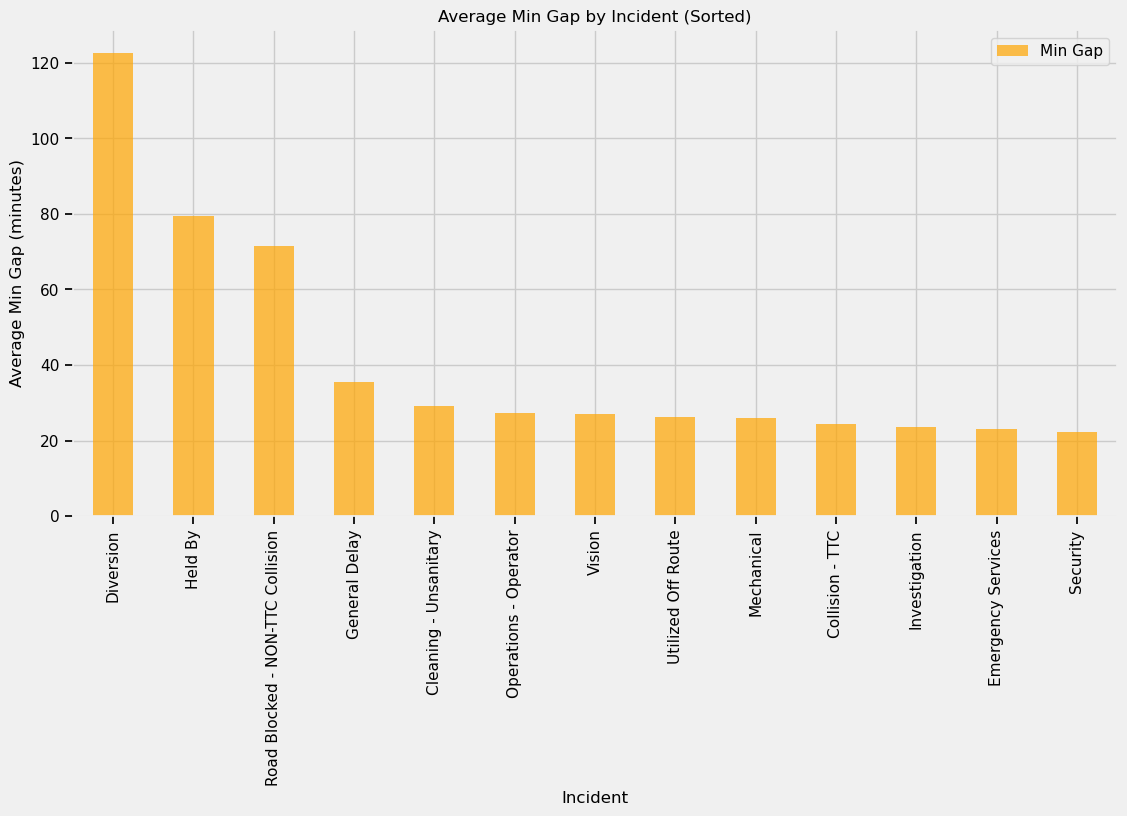

In [10]:
# Sort the data by 'Min Delay' and plot
incident_analysis = bus_2023.groupby('Incident')[['Min Delay', 'Min Gap']].mean()
incident_analysis_sorted_delay = incident_analysis.sort_values(by='Min Delay', ascending=False)
incident_analysis_sorted_delay['Min Delay'].plot(kind='bar', figsize=(12, 6), label='Min Delay', alpha=0.7)
plt.title('Average Min Delay by Incident (Sorted)')
plt.xlabel('Incident')
plt.ylabel('Average Min Delay (minutes)')
plt.xticks(rotation=90)
plt.legend()
plt.show()

# Sort the data by 'Min Gap' and plot
incident_analysis_sorted_gap = incident_analysis.sort_values(by='Min Gap', ascending=False)
incident_analysis_sorted_gap['Min Gap'].plot(kind='bar', figsize=(12, 6), color='orange', label='Min Gap', alpha=0.7)
plt.title('Average Min Gap by Incident (Sorted)')
plt.xlabel('Incident')
plt.ylabel('Average Min Gap (minutes)')
plt.xticks(rotation=90)
plt.legend()
plt.show()

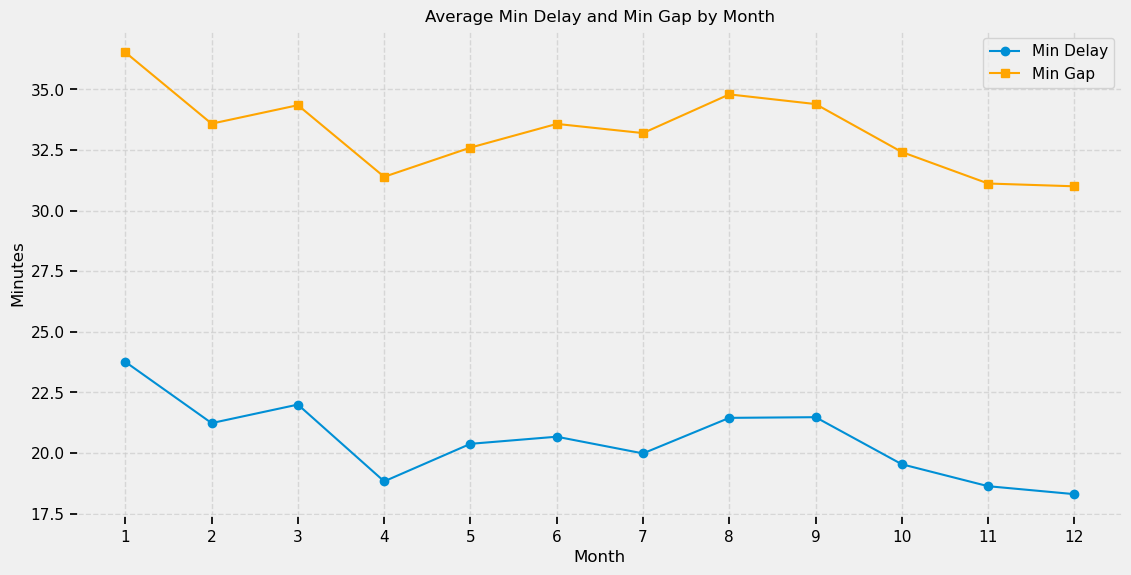

In [11]:
# Group data by Month and calculate the mean of Min Delay and Min Gap
monthly_analysis = bus_2023.groupby('Month')[['Min Delay', 'Min Gap']].mean()

# Plot Min Delay and Min Gap on the same line graph
plt.figure(figsize=(12, 6))
plt.plot(monthly_analysis.index, monthly_analysis['Min Delay'], marker='o', label='Min Delay')
plt.plot(monthly_analysis.index, monthly_analysis['Min Gap'], marker='s', label='Min Gap', color='orange')

# Add title and labels
plt.title('Average Min Delay and Min Gap by Month')
plt.xlabel('Month')
plt.ylabel('Minutes')
plt.xticks(ticks=monthly_analysis.index, labels=monthly_analysis.index)
plt.legend()
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.show()

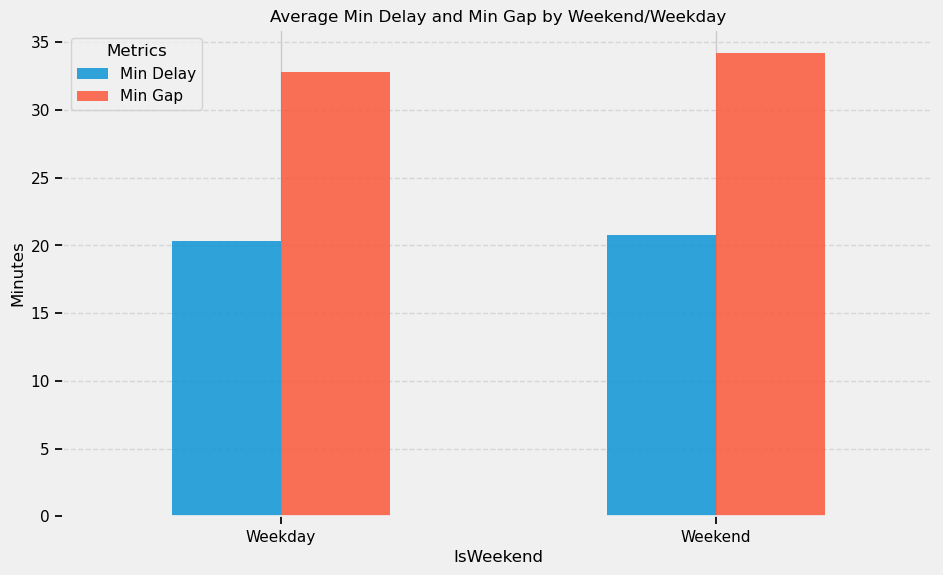

In [12]:
# Group data by IsWeekend and calculate the mean of Min Delay and Min Gap
weekend_analysis = bus_2023.groupby('IsWeekend')[['Min Delay', 'Min Gap']].mean()

# Create a bar chart for Min Delay and Min Gap
weekend_analysis.plot(kind='bar', figsize=(10, 6), alpha=0.8)

# Add title and labels
plt.title('Average Min Delay and Min Gap by Weekend/Weekday')
plt.xlabel('IsWeekend')
plt.ylabel('Minutes')
plt.xticks(ticks=[0, 1], labels=['Weekday', 'Weekend'], rotation=0)
plt.legend(title='Metrics')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

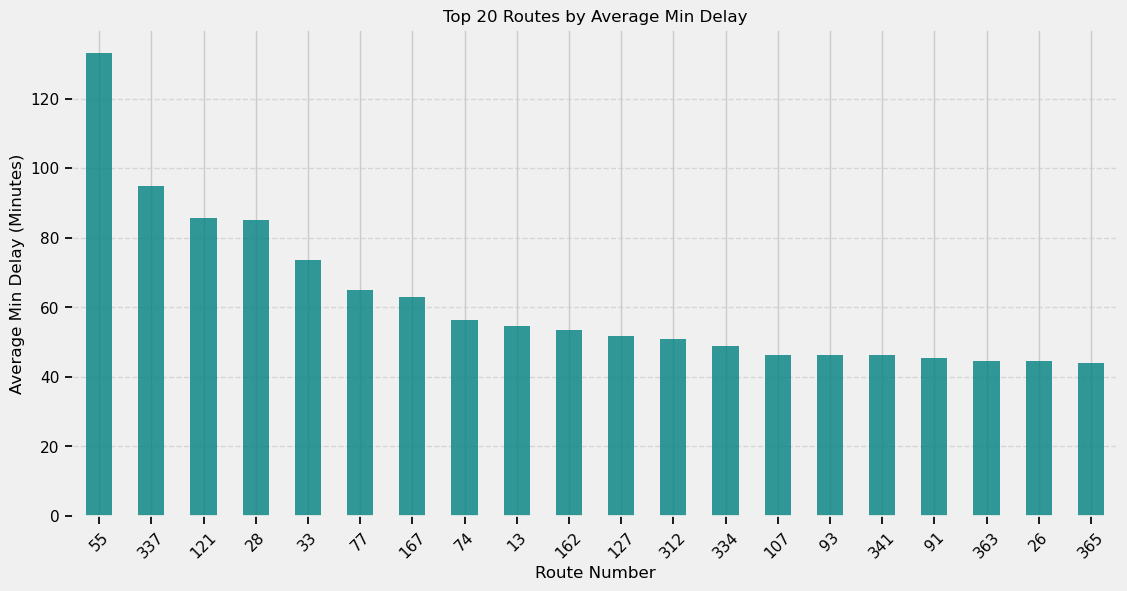

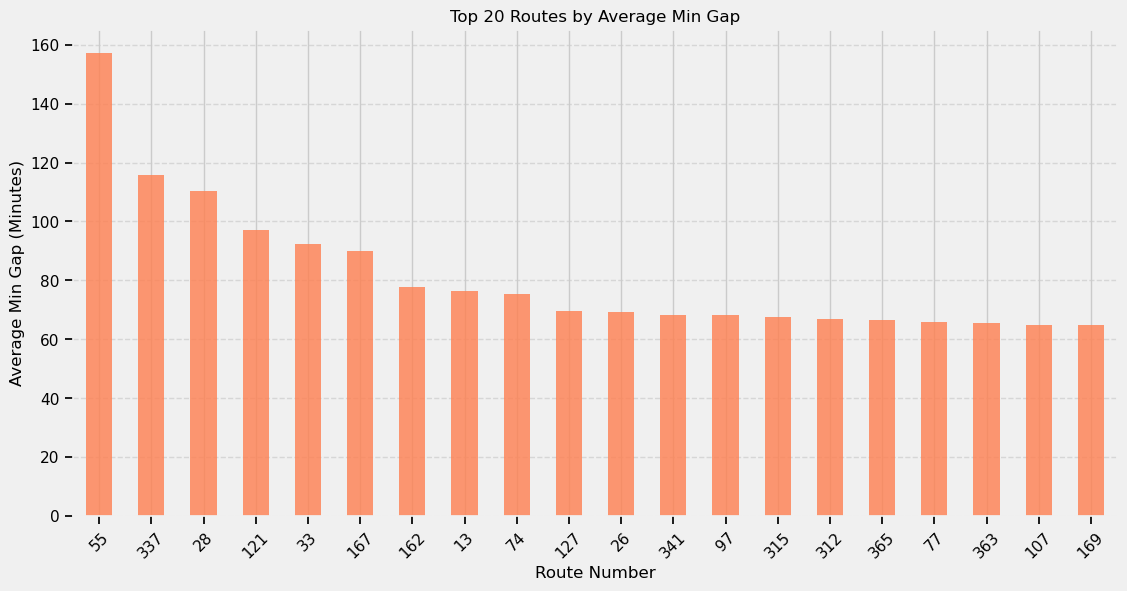

In [13]:
# Group data by Route and calculate the mean of Min Delay and Min Gap
route_analysis = bus_2023.groupby('Route')[['Min Delay', 'Min Gap']].mean()

# Sort by Min Delay and keep the top 20
top_min_delay = route_analysis['Min Delay'].sort_values(ascending=False).head(20)

# Plot Min Delay
plt.figure(figsize=(12, 6))
top_min_delay.plot(kind='bar', color='teal', alpha=0.8)
plt.title('Top 20 Routes by Average Min Delay')
plt.xlabel('Route Number')
plt.ylabel('Average Min Delay (Minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

# Sort by Min Gap and keep the top 20
top_min_gap = route_analysis['Min Gap'].sort_values(ascending=False).head(20)

# Plot Min Gap
plt.figure(figsize=(12, 6))
top_min_gap.plot(kind='bar', color='coral', alpha=0.8)
plt.title('Top 20 Routes by Average Min Gap')
plt.xlabel('Route Number')
plt.ylabel('Average Min Gap (Minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()


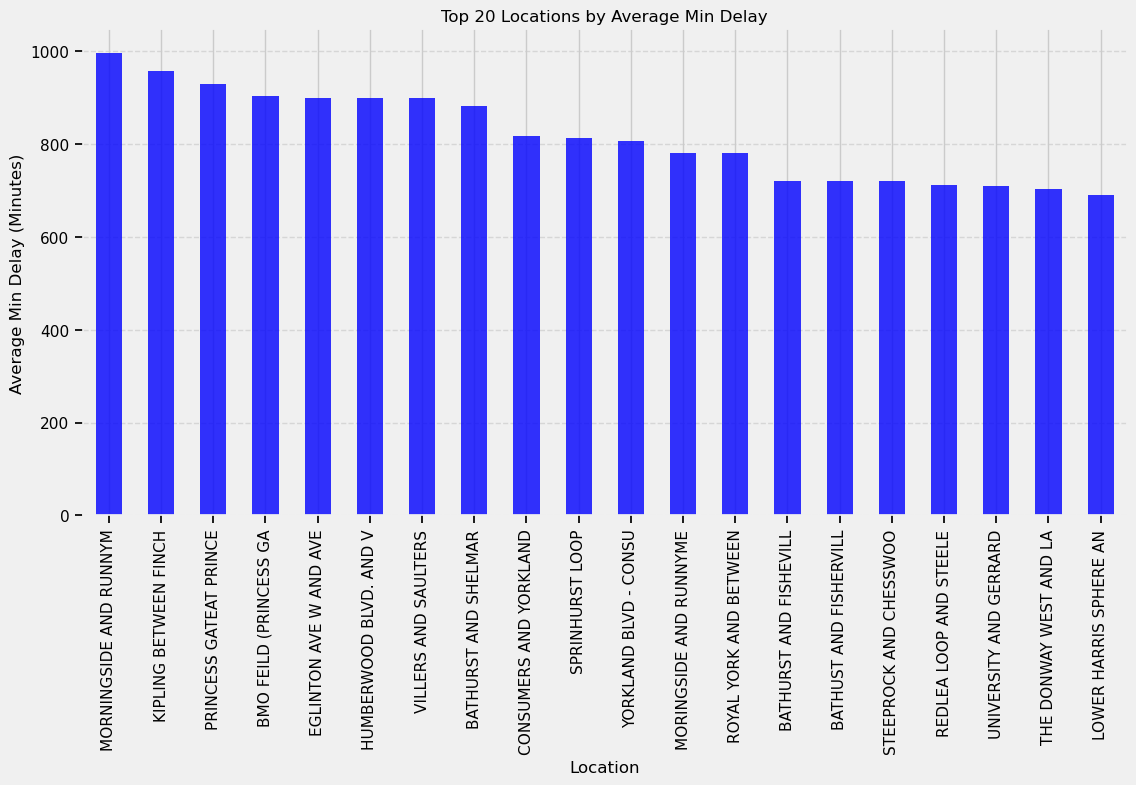

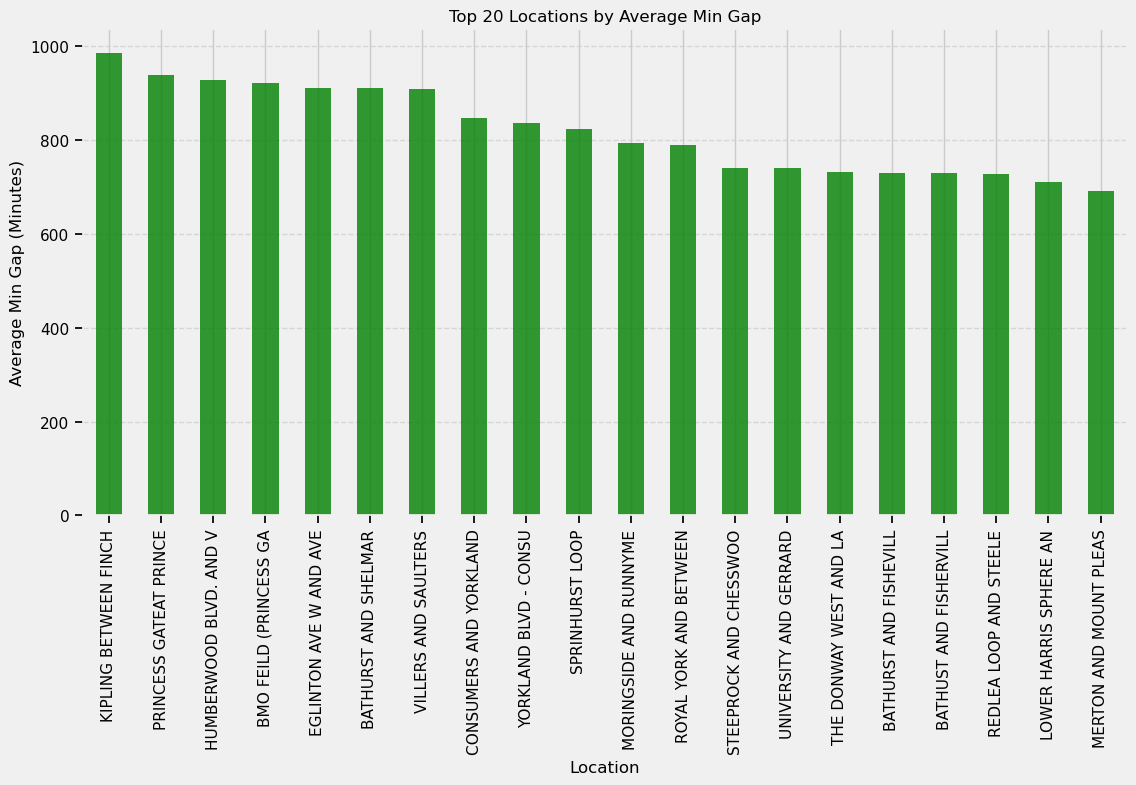

In [14]:
location_analysis = bus_2023.groupby('Location')[['Min Delay', 'Min Gap']].mean()
top_min_delay_location = location_analysis['Min Delay'].sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
top_min_delay_location.plot(kind='bar', color='blue', alpha=0.8)
plt.title('Top 20 Locations by Average Min Delay')
plt.xlabel('Location')
plt.ylabel('Average Min Delay (Minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)
plt.show()
top_min_gap_location = location_analysis['Min Gap'].sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
top_min_gap_location.plot(kind='bar', color='green', alpha=0.8)
plt.title('Top 20 Locations by Average Min Gap')
plt.xlabel('Location')
plt.ylabel('Average Min Gap (Minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)
plt.show()


In [15]:
# Generate new columns to assign scores to non-float columns
# Calculate the average Min Delay for each Route
route_scores = bus_2023.groupby('Route')['Min Delay'].mean()
bus_2023['Route Score'] = bus_2023['Route'].map(route_scores)

# Calculate the average Min Delay for each Location
location_scores = bus_2023.groupby('Location')['Min Delay'].mean()
bus_2023['Location Score'] = bus_2023['Location'].map(location_scores)

# Calculate the average Min Delay for each Incident
incident_scores = bus_2023.groupby('Incident')['Min Delay'].mean()
bus_2023['Incident Score'] = bus_2023['Incident'].map(incident_scores)

# Calculate the average Min Delay for each Direction
direction_scores = bus_2023.groupby('Direction')['Min Delay'].mean()
bus_2023['Direction Score'] = bus_2023['Direction'].map(direction_scores)

bus_2023.head()

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle,...,IsWeekend,Weekday,Year,Month,IsDark,snow_class,Route Score,Location Score,Incident Score,Direction Score
0,2023-01-01,91,02:30,1,WOODBINE AND MORTIMER,Diversion,81,111,All Direction,8772,...,True,Sunday,2023,1,True,1,45.469072,27.333333,106.801904,24.340621
1,2023-01-01,69,02:34,1,WARDEN STATION,Security,22,44,S,8407,...,True,Sunday,2023,1,True,1,17.906977,16.900826,11.537764,18.796694
2,2023-01-01,35,03:06,1,JANE STATION,Cleaning - Unsanitary,30,60,N,1051,...,True,Sunday,2023,1,True,1,12.484615,13.004673,14.630303,19.732277
3,2023-01-01,900,03:14,1,KIPLING STATION,Security,17,17,All Direction,3334,...,True,Sunday,2023,1,True,1,14.823308,13.717124,11.537764,24.340621
4,2023-01-01,85,03:43,1,MEADOWALE LOOP,Security,1,1,All Direction,1559,...,True,Sunday,2023,1,True,1,16.471496,0.500000,11.537764,24.340621


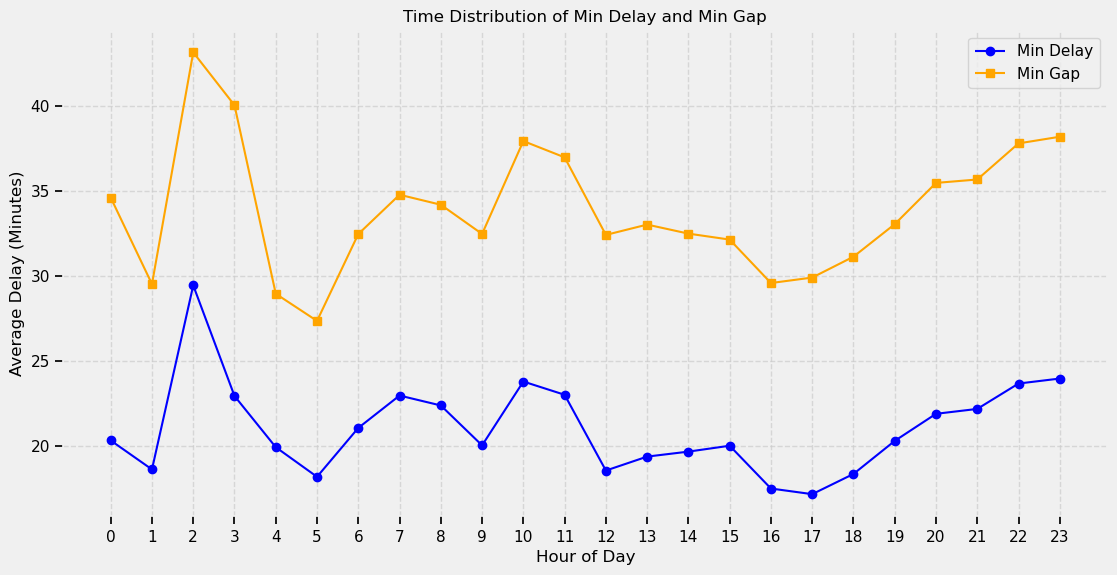

In [16]:
# Ensure the 'Time' column is in datetime format
# Adjust the format to match the structure of the time data
bus_2023['Time'] = pd.to_datetime(bus_2023['Time'], format='%H:%M', errors='coerce')

# Drop rows with invalid Time values
bus_2023 = bus_2023.dropna(subset=['Time'])

# Extract the hour from the 'Time' column
bus_2023['Hour'] = bus_2023['Time'].dt.hour

# Group by hour and calculate the average Min Delay and Min Gap
time_distribution = bus_2023.groupby('Hour')[['Min Delay', 'Min Gap']].mean()

# Plot the time distribution for Min Delay and Min Gap
plt.figure(figsize=(12, 6))
plt.plot(time_distribution.index, time_distribution['Min Delay'], marker='o', label='Min Delay', color='blue')
plt.plot(time_distribution.index, time_distribution['Min Gap'], marker='s', label='Min Gap', color='orange')
plt.title('Time Distribution of Min Delay and Min Gap')
plt.xlabel('Hour of Day')
plt.ylabel('Average Delay (Minutes)')
plt.xticks(ticks=range(0, 24), labels=range(0, 24))
plt.legend()
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.show()


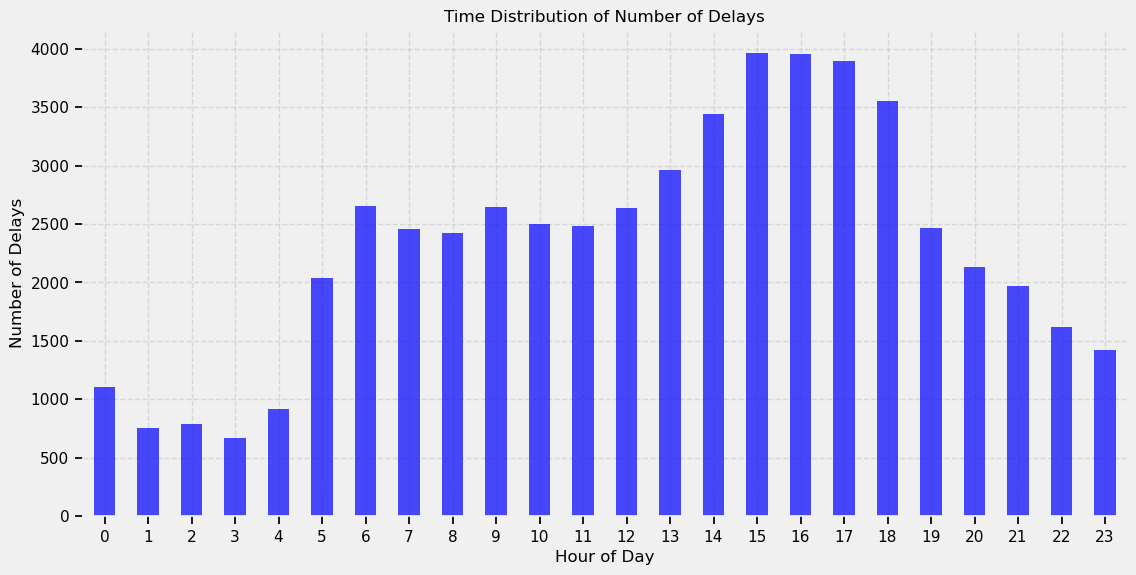

In [17]:
# Ensure the 'Time' column is in datetime format
bus_2023['Time'] = pd.to_datetime(bus_2023['Time'], format='%H:%M', errors='coerce')

# Drop rows with invalid Time values
bus_2023 = bus_2023.dropna(subset=['Time'])

# Extract the hour from the 'Time' column
bus_2023['Hour'] = bus_2023['Time'].dt.hour

# Group by hour and count the number of delays (number of rows per hour)
time_delay_count = bus_2023.groupby('Hour').size()

# Plot the time distribution for the number of delays
plt.figure(figsize=(12, 6))
time_delay_count.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Time Distribution of Number of Delays')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Delays')
plt.xticks(ticks=range(0, 24), labels=range(0, 24), rotation=0)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.show()


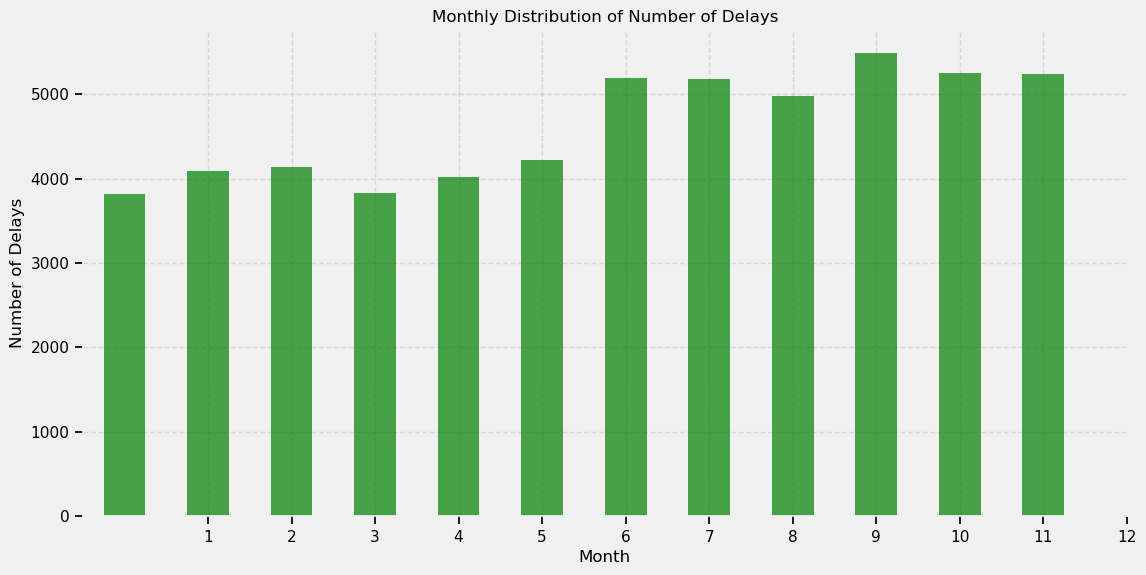

In [18]:
# Group by month and count the number of delays (number of rows per month)
month_delay_count = bus_2023.groupby('Month').size()

# Plot the distribution of the number of delays by month
plt.figure(figsize=(12, 6))
month_delay_count.plot(kind='bar', color='green', alpha=0.7)
plt.title('Monthly Distribution of Number of Delays')
plt.xlabel('Month')
plt.ylabel('Number of Delays')
plt.xticks(ticks=range(1, 13), labels=range(1, 13), rotation=0)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.show()


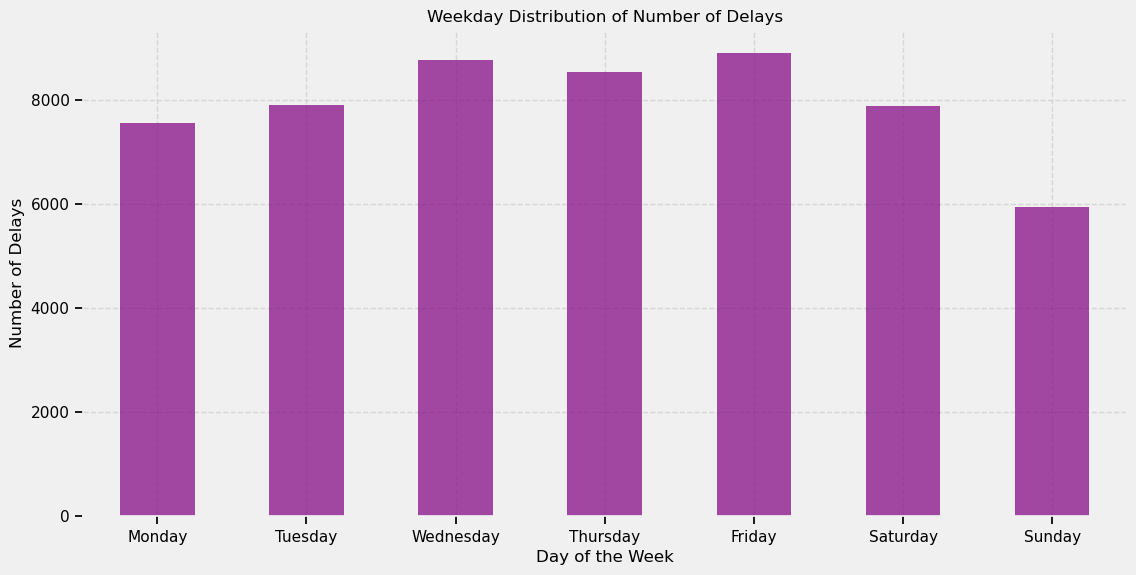

In [19]:
import matplotlib.pyplot as plt

# Group by Day (weekday) and count the number of delays (number of rows per weekday)
weekday_delay_count = bus_2023.groupby('Weekday').size()

# Ensure weekdays are sorted in the correct order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_delay_count = weekday_delay_count.reindex(weekday_order)

# Plot the distribution of the number of delays by weekday
plt.figure(figsize=(12, 6))
weekday_delay_count.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Weekday Distribution of Number of Delays')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Delays')
plt.xticks(rotation=0)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.show()


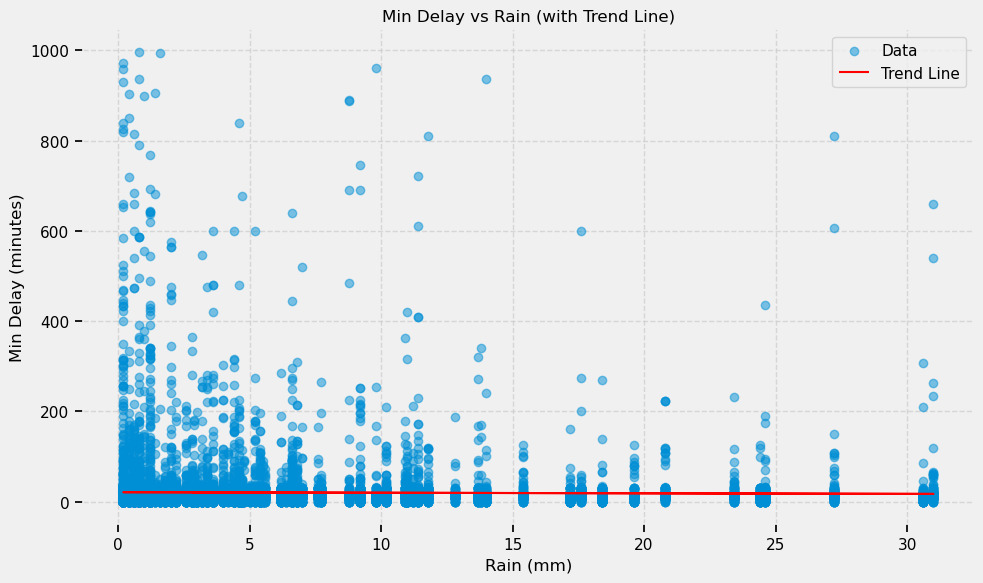

In [20]:
# Filter data where rain > 0
rain_filtered = bus_2023[bus_2023['rain'] > 0]

# Prepare data for linear regression
X_rain = rain_filtered[['rain']].values  # Predictor
y_rain = rain_filtered['Min Delay'].values  # Target

# Fit a linear regression model
rain_model = LinearRegression()
rain_model.fit(X_rain, y_rain)

# Predict values for trend line
rain_trend = rain_model.predict(X_rain)

# Scatter plot with trend line
plt.figure(figsize=(10, 6))
plt.scatter(rain_filtered['rain'], rain_filtered['Min Delay'], alpha=0.5, label='Data')
plt.plot(rain_filtered['rain'], rain_trend, color='red', label='Trend Line')
plt.title('Min Delay vs Rain (with Trend Line)')
plt.xlabel('Rain (mm)')
plt.ylabel('Min Delay (minutes)')
plt.legend()
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

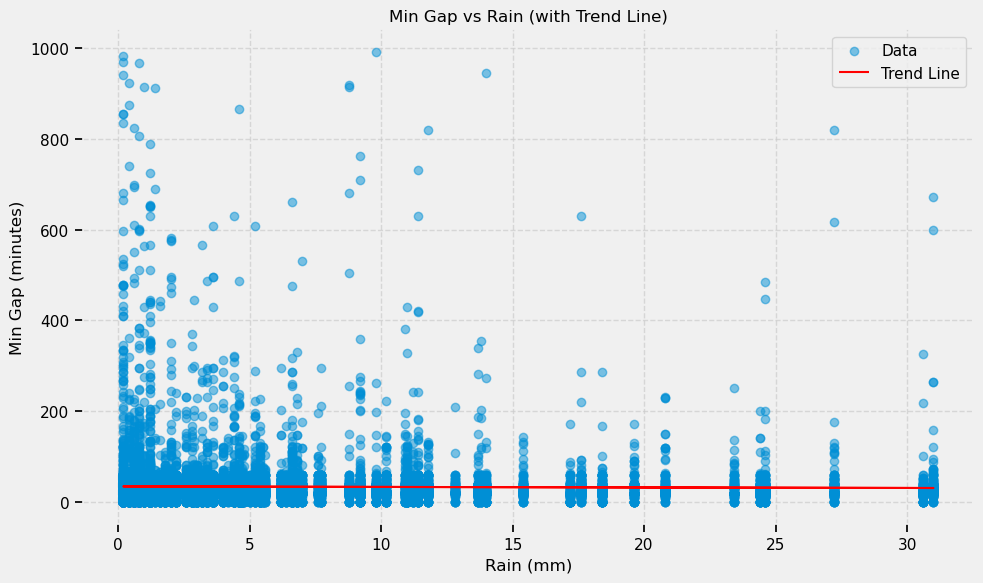

In [21]:
# Filter data where rain > 0
rain_filtered = bus_2023[bus_2023['rain'] > 0]

# Prepare data for linear regression
X_rain = rain_filtered[['rain']].values  # Predictor
y_rain = rain_filtered['Min Gap'].values  # Target

# Fit a linear regression model
rain_model = LinearRegression()
rain_model.fit(X_rain, y_rain)

# Predict values for trend line
rain_trend = rain_model.predict(X_rain)

# Scatter plot with trend line
plt.figure(figsize=(10, 6))
plt.scatter(rain_filtered['rain'], rain_filtered['Min Gap'], alpha=0.5, label='Data')
plt.plot(rain_filtered['rain'], rain_trend, color='red', label='Trend Line')
plt.title('Min Gap vs Rain (with Trend Line)')
plt.xlabel('Rain (mm)')
plt.ylabel('Min Gap (minutes)')
plt.legend()
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

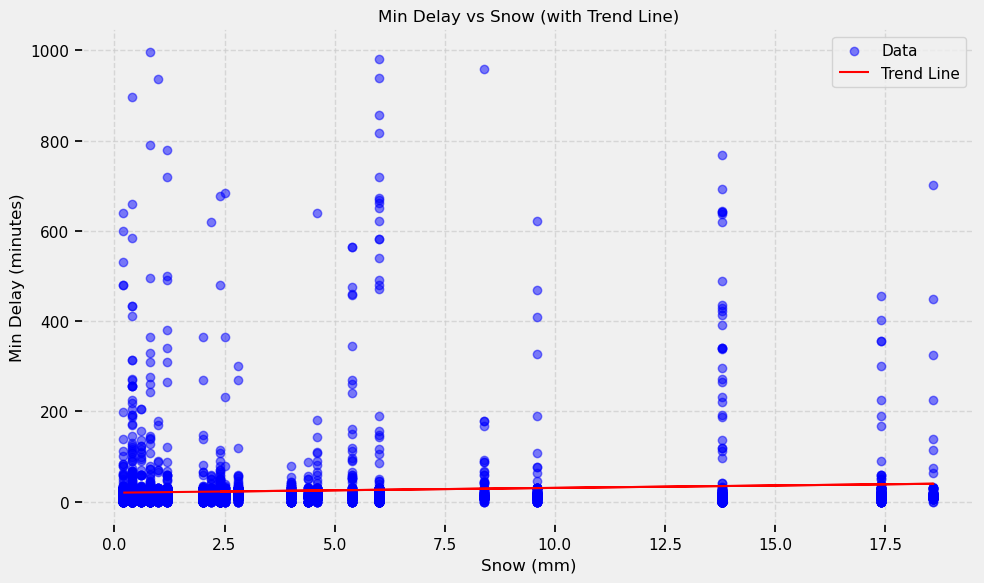

In [22]:
# Filter data where snow > 0
snow_filtered = bus_2023[bus_2023['snow'] > 0]

# Prepare data for linear regression
X_snow = snow_filtered[['snow']].values  # Predictor
y_snow = snow_filtered['Min Delay'].values  # Target

# Fit a linear regression model
snow_model = LinearRegression()
snow_model.fit(X_snow, y_snow)

# Predict values for trend line
snow_trend = snow_model.predict(X_snow)

# Scatter plot with trend line
plt.figure(figsize=(10, 6))
plt.scatter(snow_filtered['snow'], snow_filtered['Min Delay'], alpha=0.5, color='blue', label='Data')
plt.plot(snow_filtered['snow'], snow_trend, color='red', label='Trend Line')
plt.title('Min Delay vs Snow (with Trend Line)')
plt.xlabel('Snow (mm)')
plt.ylabel('Min Delay (minutes)')
plt.legend()
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


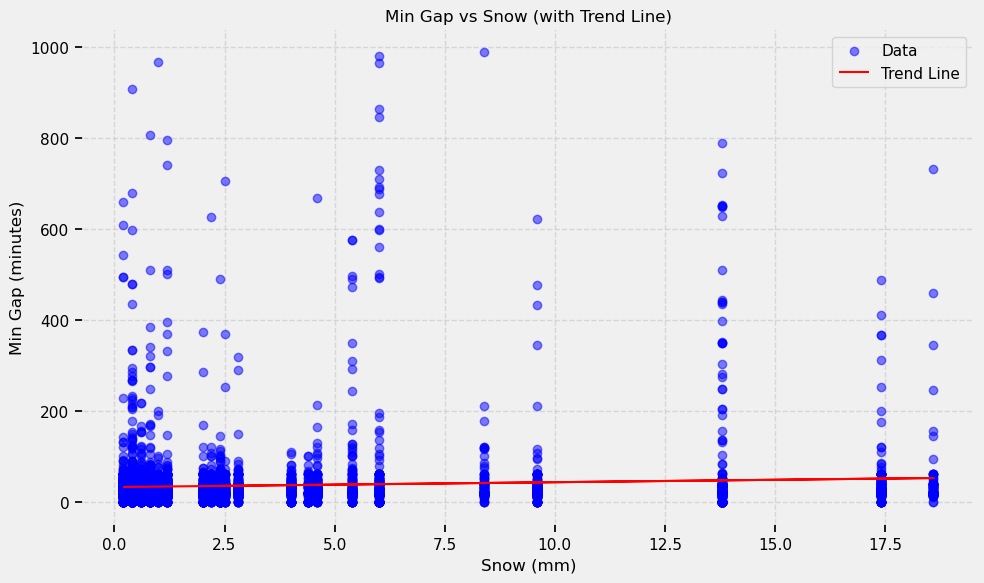

In [23]:
# Filter data where snow > 0
snow_filtered = bus_2023[bus_2023['snow'] > 0]

# Prepare data for linear regression
X_snow = snow_filtered[['snow']].values  # Predictor
y_snow = snow_filtered['Min Gap'].values  # Target

# Fit a linear regression model
snow_model = LinearRegression()
snow_model.fit(X_snow, y_snow)

# Predict values for trend line
snow_trend = snow_model.predict(X_snow)

# Scatter plot with trend line
plt.figure(figsize=(10, 6))
plt.scatter(snow_filtered['snow'], snow_filtered['Min Gap'], alpha=0.5, color='blue', label='Data')
plt.plot(snow_filtered['snow'], snow_trend, color='red', label='Trend Line')
plt.title('Min Gap vs Snow (with Trend Line)')
plt.xlabel('Snow (mm)')
plt.ylabel('Min Gap (minutes)')
plt.legend()
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


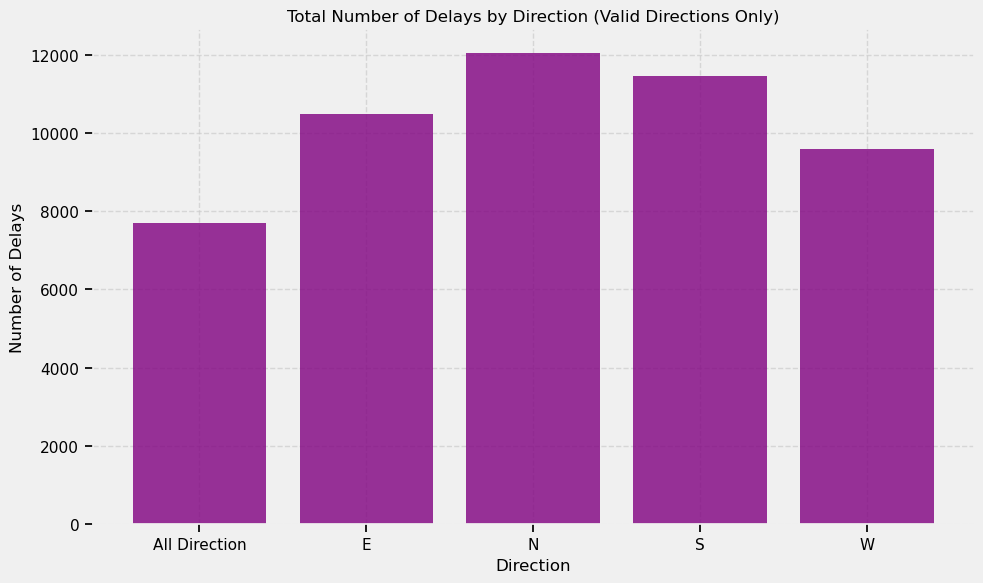

In [24]:
# Filter the data to include only valid directions ('N', 'S', 'W', 'E', 'Both')
valid_directions = ['N', 'S', 'W', 'E', 'All Direction']
bus_2023_filtered = bus_2023[bus_2023['Direction'].isin(valid_directions)]

# Group by 'Direction' and count the total number of delays (Min Delay > 0)
direction_delay_counts = bus_2023_filtered[bus_2023_filtered['Min Delay'] > 0].groupby('Direction').size()

# Plot total number of delays for each direction
plt.figure(figsize=(10, 6))
plt.bar(direction_delay_counts.index, direction_delay_counts.values, color='purple', alpha=0.8)
plt.title('Total Number of Delays by Direction (Valid Directions Only)')
plt.xlabel('Direction')
plt.ylabel('Number of Delays')
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Apply random forest to see importance factor affecting min delay and min gap

In [26]:
bus_2023.columns.unique()

Index(['Date', 'Route', 'Time', 'Day', 'Location', 'Incident', 'Min Delay',
       'Min Gap', 'Direction', 'Vehicle', 'date_x', 'date_y',
       'max_temperature', 'avg_hourly_temperature', 'avg_temperature',
       'min_temperature', 'max_relative_humidity',
       'avg_hourly_relative_humidity', 'avg_relative_humidity',
       'min_relative_humidity', 'max_dew_point', 'avg_hourly_dew_point',
       'avg_dew_point', 'min_dew_point', 'max_wind_speed',
       'avg_hourly_wind_speed', 'avg_wind_speed', 'min_wind_speed',
       'max_pressure_sea', 'avg_hourly_pressure_sea', 'avg_pressure_sea',
       'min_pressure_sea', 'max_pressure_station',
       'avg_hourly_pressure_station', 'avg_pressure_station',
       'min_pressure_station', 'max_visibility', 'avg_hourly_visibility',
       'avg_visibility', 'min_visibility', 'heatdegdays', 'cooldegdays',
       'growdegdays_5', 'growdegdays_7', 'growdegdays_10', 'precipitation',
       'rain', 'snow', 'snow_on_ground', 'sunrise_hhmm', 'sunrise_

In [27]:
def feature_engineering(data):
    feature_selected = ['Location Score', 'Incident Score', 'Route Score', 'Vehicle', 'unix_time', 'Direction Score', 
 'Day', 'avg_hourly_wind_speed', 'min_pressure_station', 'min_pressure_sea', 'min_relative_humidity', 
 'sunrise_f', 'avg_hourly_relative_humidity', 'max_wind_speed', 'max_dew_point','rain','snow','snow_on_ground','precipitation','snow_class'] # select the top important features


    # Filter for columns that actually exist in the DataFrame
    existing_features = [feature for feature in feature_selected if feature in data.columns]

    selected_data = data[existing_features]
    return selected_data

# Apply the updated feature selection function
X = feature_engineering(bus_2023)
X.to_csv('processed_features.csv', index=False)

display(X.head())

# Target variable
y_delay = bus_2023['Min Delay']
y_gap = bus_2023['Min Gap']
display(y_delay.head())
display(y_gap.head())

,Location Score,Incident Score,Route Score,Vehicle,unix_time,Direction Score,Day,avg_hourly_wind_speed,min_pressure_station,min_pressure_sea,min_relative_humidity,sunrise_f,avg_hourly_relative_humidity,max_wind_speed,max_dew_point,rain,snow,snow_on_ground,precipitation,snow_class
0,27.333333,106.801904,45.469072,8772,1672540200,24.340621,1,11.38,99.08,101.19,78,7.85,94.5,21,4.1,2.8,0.0,0.0,2.8,1
1,16.900826,11.537764,17.906977,8407,1672540440,18.796694,1,11.38,99.08,101.19,78,7.85,94.5,21,4.1,2.8,0.0,0.0,2.8,1
2,13.004673,14.630303,12.484615,1051,1672542360,19.732277,1,11.38,99.08,101.19,78,7.85,94.5,21,4.1,2.8,0.0,0.0,2.8,1
3,13.717124,11.537764,14.823308,3334,1672542840,24.340621,1,11.38,99.08,101.19,78,7.85,94.5,21,4.1,2.8,0.0,0.0,2.8,1
4,0.500000,11.537764,16.471496,1559,1672544580,24.340621,1,11.38,99.08,101.19,78,7.85,94.5,21,4.1,2.8,0.0,0.0,2.8,1


0    81
1    22
2    30
3    17
4     1
Name: Min Delay, dtype: int64

0    111
1     44
2     60
3     17
4      1
Name: Min Gap, dtype: int64

In [28]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_delay, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"R² Score: {r2:.3f}")

R² Score: 0.555



Top Important Features:
                         Feature  Importance
0                 Location Score    0.461401
1                 Incident Score    0.163835
2                    Route Score    0.046691
4                      unix_time    0.044120
3                        Vehicle    0.032700
14                 max_dew_point    0.026632
6                            Day    0.022888
5                Direction Score    0.022511
11                     sunrise_f    0.022024
8           min_pressure_station    0.021270
7          avg_hourly_wind_speed    0.020383
12  avg_hourly_relative_humidity    0.018898
9               min_pressure_sea    0.018694
10         min_relative_humidity    0.018665
13                max_wind_speed    0.016425
17                snow_on_ground    0.015275
16                          snow    0.010111
15                          rain    0.008152
18                 precipitation    0.007954
19                    snow_class    0.001372


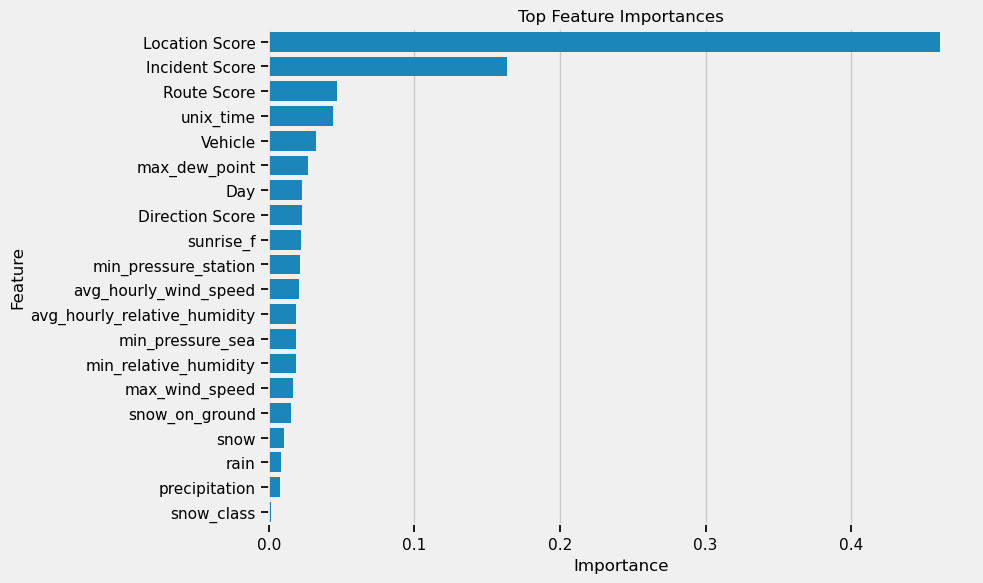

In [29]:
# Feature importances
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 features
print("\nTop Important Features:")
print(feature_importance_df.head(30))

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(30))
plt.title('Top Feature Importances')
plt.tight_layout()
plt.show()

R² Score for Min Gap: 0.552

Top Important Features for Min Gap:
                         Feature  Importance
0                 Location Score    0.423118
1                 Incident Score    0.167702
2                    Route Score    0.067621
4                      unix_time    0.044477
3                        Vehicle    0.039120
5                Direction Score    0.025605
14                 max_dew_point    0.025538
6                            Day    0.021619
7          avg_hourly_wind_speed    0.021591
11                     sunrise_f    0.021200
8           min_pressure_station    0.020452
12  avg_hourly_relative_humidity    0.020314
10         min_relative_humidity    0.019814
9               min_pressure_sea    0.019689
13                max_wind_speed    0.016923
17                snow_on_ground    0.016160
16                          snow    0.010025
18                 precipitation    0.009227
15                          rain    0.008225
19                    snow_class   

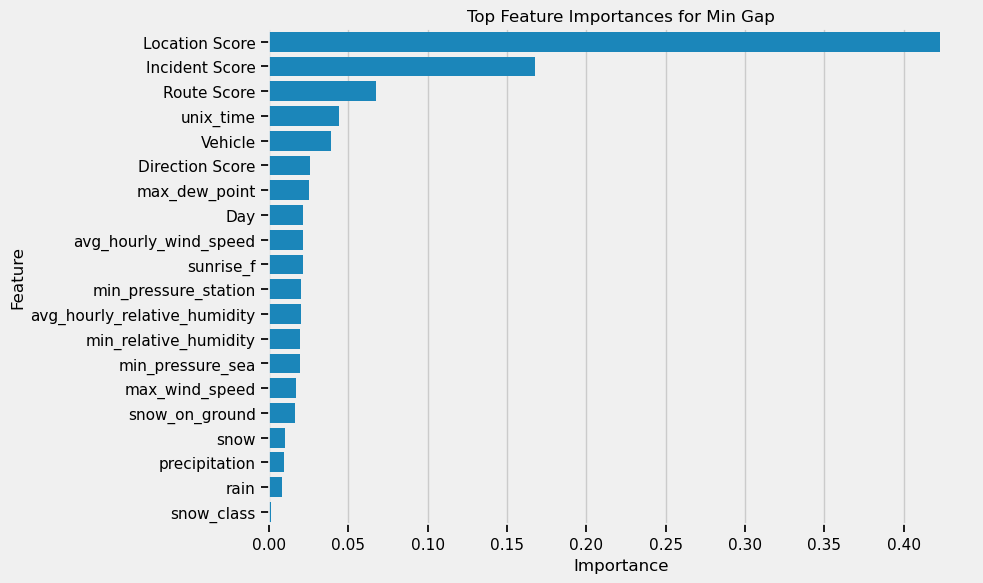

In [30]:
# Split data into training and test sets for Min Gap
X_train_gap, X_test_gap, y_train_gap, y_test_gap = train_test_split(X, y_gap, test_size=0.2, random_state=42)

# Train a Random Forest Regressor for Min Gap
rf_model_gap = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_gap.fit(X_train_gap, y_train_gap)

# Predict on the test set for Min Gap
y_pred_gap = rf_model_gap.predict(X_test_gap)

# Evaluate the model
r2_gap = r2_score(y_test_gap, y_pred_gap)

# Print evaluation metrics for Min Gap
print(f"R² Score for Min Gap: {r2_gap:.3f}")

# Feature importances for Min Gap
importances_gap = rf_model_gap.feature_importances_
feature_names_gap = X.columns
feature_importance_df_gap = pd.DataFrame({
    'Feature': feature_names_gap,
    'Importance': importances_gap
})

# Sort features by importance
feature_importance_df_gap = feature_importance_df_gap.sort_values(by='Importance', ascending=False)

# Display the top 30 features for Min Gap
print("\nTop Important Features for Min Gap:")
print(feature_importance_df_gap.head(30))

# Plot the top 30 feature importances for Min Gap
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_gap.head(30))
plt.title('Top Feature Importances for Min Gap')
plt.tight_layout()
plt.show()
